# Chicago Crime Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Load only the first 10,000 rows to avoid MemoryError
df = pd.read_csv(r"C:\Users\Hp\Downloads\chicago_crime\Crimes_-_2001_to_Present.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


#### **Preliminary Data Analysis (PDA)**

In [26]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (7784664, 22)


In [27]:
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Memory Usage: 5302.92 MB


In [28]:
print(f"List of columns:{df.columns}")

List of columns:Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [29]:
# columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [30]:
df.describe(include='all')

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,7.784664e+06,7784660,7784664,7784664,7784664,7784664,7784664,7774283,7784664,7784664,...,7.169816e+06,7.171188e+06,7784664,7.697816e+06,7.697816e+06,7.784664e+06,7784664,7.697816e+06,7.697816e+06,7697816
unique,NaN,7784121,3207478,62845,404,36,544,215,2,2,...,NaN,NaN,26,NaN,NaN,NaN,5561,NaN,NaN,890516
top,NaN,HJ590004,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,...,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.976290414, -87.905227221)"
freq,NaN,6,304,16486,631091,1642148,913484,2026828,5749900,6708370,...,NaN,NaN,1642148,NaN,NaN,NaN,2787942,NaN,NaN,14272
mean,7.026439e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.275420e+01,3.748472e+01,NaN,1.164601e+06,1.885783e+06,2.009944e+03,NaN,4.184218e+01,-8.767149e+01,NaN
std,3.502657e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.385106e+01,2.154115e+01,NaN,1.684658e+04,3.227531e+04,6.260628e+00,NaN,8.879598e-02,6.108257e-02,NaN
min,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.001000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,3.792574e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+01,2.300000e+01,NaN,1.152976e+06,1.859073e+06,2.005000e+03,NaN,4.176871e+01,-8.771367e+01,NaN
50%,7.029327e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.300000e+01,3.200000e+01,NaN,1.166110e+06,1.890730e+06,2.009000e+03,NaN,4.185591e+01,-8.766584e+01,NaN
75%,1.013113e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000e+01,5.700000e+01,NaN,1.176372e+06,1.909273e+06,2.015000e+03,NaN,4.190677e+01,-8.762819e+01,NaN


**Analyzing missing data**

In [37]:

def analyze_missing_data(df):
    
    """Analyze missing data patterns"""
    
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    
    missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    
    print("=== MISSING DATA ANALYSIS ===")
    print(missing_data)
    
    # Visualize missing data
    plt.figure(figsize=(12, 6))
    if not missing_data.empty:
        plt.bar(missing_data['Column'], missing_data['Missing_Percentage'])
        plt.title('Missing Data by Column')
        plt.xlabel('Columns')
        plt.ylabel('Missing Percentage (%)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No missing data found!")

=== MISSING DATA ANALYSIS ===
                                    Column  Missing_Count  Missing_Percentage  \
Ward                                  Ward         614848            7.898196   
Community Area              Community Area         613476            7.880571   
X Coordinate                  X Coordinate          86848            1.115629   
Y Coordinate                  Y Coordinate          86848            1.115629   
Latitude                          Latitude          86848            1.115629   
Longitude                        Longitude          86848            1.115629   
Location                          Location          86848            1.115629   
Location Description  Location Description          10381            0.133352   
District                          District             47            0.000604   
Case Number                    Case Number              4            0.000051   

                     Data_Type  
Ward                   float64  
Community Ar

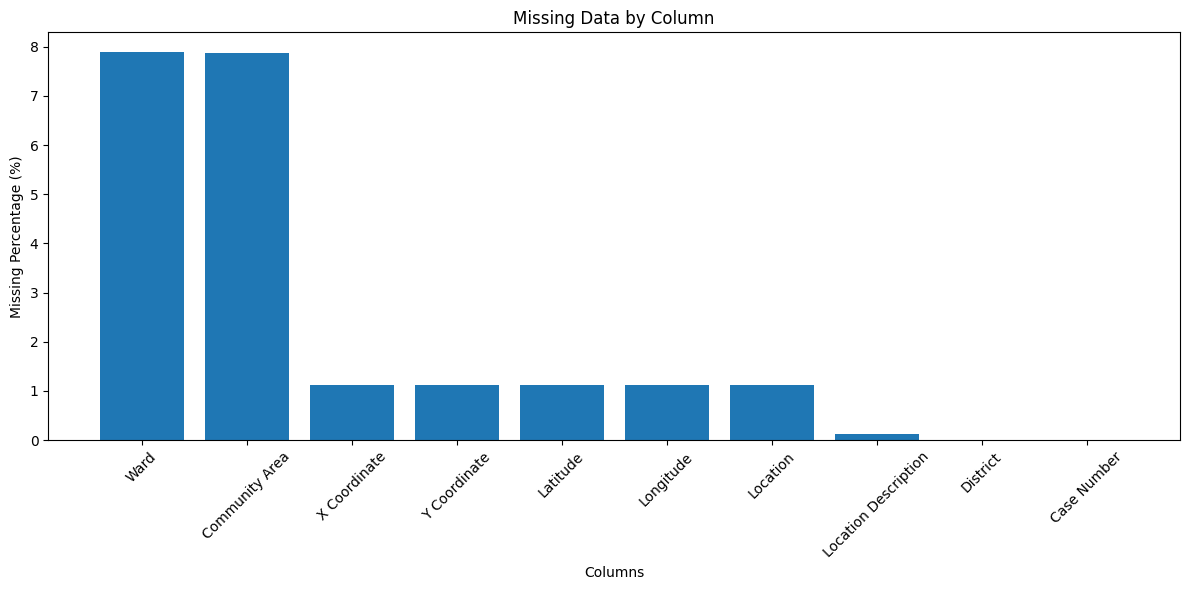

In [38]:
analyze_missing_data(df)

In [39]:
# checking for distribution of crimes by primary type
crime_counts = df['Primary Type'].value_counts()
print(crime_counts)


Primary Type
THEFT                                1642148
BATTERY                              1422913
CRIMINAL DAMAGE                       887266
NARCOTICS                             747633
ASSAULT                               507296
OTHER OFFENSE                         483642
BURGLARY                              424397
MOTOR VEHICLE THEFT                   375495
DECEPTIVE PRACTICE                    344940
ROBBERY                               292334
CRIMINAL TRESPASS                     214316
WEAPONS VIOLATION                     106418
PROSTITUTION                           69840
OFFENSE INVOLVING CHILDREN             55719
PUBLIC PEACE VIOLATION                 52325
SEX OFFENSE                            30683
CRIM SEXUAL ASSAULT                    27631
INTERFERENCE WITH PUBLIC OFFICER       18392
LIQUOR LAW VIOLATION                   14901
GAMBLING                               14618
ARSON                                  13249
HOMICIDE                               125

In [40]:
# Top 10 most frequent crime types
top_10_crimes = crime_counts.head(10)
print(top_10_crimes)

Primary Type
THEFT                  1642148
BATTERY                1422913
CRIMINAL DAMAGE         887266
NARCOTICS               747633
ASSAULT                 507296
OTHER OFFENSE           483642
BURGLARY                424397
MOTOR VEHICLE THEFT     375495
DECEPTIVE PRACTICE      344940
ROBBERY                 292334
Name: count, dtype: int64


In [43]:
# overall arrest rate
arrest_rate = df['Arrest'].mean() * 100
print(f"Arrest Rate: {arrest_rate:.2f}%")


Arrest Rate: 26.14%


In [44]:
# Domestic vilence rate
domestic_violence_rate = df['Domestic'].mean() * 100
print(f"Domestic Violence Rate: {domestic_violence_rate:.2f}%")

Domestic Violence Rate: 13.83%


### **Data Cleaning and Preprocessing**

In [45]:
print(f"Numbers of unique crime types: {len(df['Primary Type'].unique())}")

# We can also use this to check the number of unique values in a column
print(f"This also works: {(df['Primary Type'].nunique())}")

# Lets view the list of unique crrime types
print(df['Primary Type'].unique())

Numbers of unique crime types: 36
This also works: 36
['BATTERY' 'THEFT' 'NARCOTICS' 'ASSAULT' 'BURGLARY' 'ROBBERY'
 'DECEPTIVE PRACTICE' 'OTHER OFFENSE' 'CRIMINAL DAMAGE'
 'WEAPONS VIOLATION' 'CRIMINAL TRESPASS' 'MOTOR VEHICLE THEFT'
 'SEX OFFENSE' 'INTERFERENCE WITH PUBLIC OFFICER'
 'OFFENSE INVOLVING CHILDREN' 'PUBLIC PEACE VIOLATION' 'PROSTITUTION'
 'GAMBLING' 'CRIM SEXUAL ASSAULT' 'LIQUOR LAW VIOLATION'
 'CRIMINAL SEXUAL ASSAULT' 'ARSON' 'STALKING' 'KIDNAPPING' 'INTIMIDATION'
 'CONCEALED CARRY LICENSE VIOLATION' 'NON - CRIMINAL' 'HUMAN TRAFFICKING'
 'OBSCENITY' 'PUBLIC INDECENCY' 'OTHER NARCOTIC VIOLATION' 'NON-CRIMINAL'
 'HOMICIDE' 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'RITUALISM'
 'DOMESTIC VIOLENCE']
